# **Preview of kingsk4 Data**

In [2]:
import pandas as pd

df_meta = pd.read_csv('../Data/Gold/kingsk4_meta_gold.csv')
df_moves = pd.read_csv('../Data/Gold/kingsk4_moves_gold.csv')

In [3]:
df_meta.head(3)

,game_id,Date,White,Black,Result,ECO,WhiteElo,BlackElo,TimeControl,Termination,Tournament,StartDateTime,EndDateTime
0,1,2025.11.22,G3rHaN4,kingsk4,1,A00,665,649,300,2,NaN,2025-11-22 02:01:16,2025-11-22 02:11:16
1,2,2025.11.22,MaximumElvis,kingsk4,0,B07,629,661,300,0,NaN,2025-11-22 00:22:25,2025-11-22 00:31:54
2,3,2025.11.21,kingsk4,jesus-shuttlesworth33,1,D00,650,638,300,0,NaN,2025-11-21 01:56:17,2025-11-21 02:00:33


In [4]:
df_moves.head(3)

,game_id,ply,color,move,clock,eval,fen
0,1,1,True,c3,0:04:59,-0.07,rnbqkbnr/pppppppp/8/8/8/2P5/PP1PPPPP/RNBQKBNR ...
1,1,2,False,d6,0:04:57.6,0.15,rnbqkbnr/ppp1pppp/3p4/8/8/2P5/PP1PPPPP/RNBQKBN...
2,1,3,True,e3,0:04:57.7,-0.15,rnbqkbnr/ppp1pppp/3p4/8/8/2P1P3/PP1P1PPP/RNBQK...


## First degree termination insights

In [5]:
# Inverse mapping for termination codes
inv_term_map = {
    0: 'won by checkmate',
    1: 'won by resignation',
    2: 'won on time',
    3: 'won - game abandoned',
    4: 'game drawn by stalemate',
    5: 'game drawn by repetition',
    6: 'game drawn by insufficient material',
    7: 'game drawn by 50-move rule',
    8: 'game drawn by timeout vs insufficient material',
    9: 'game drawn by agreement'
}

termination = df_meta['Termination'].value_counts()
termination = termination.rename(index=inv_term_map)
print(termination)

Termination
won by checkmate                                  1647
won on time                                       1532
won by resignation                                 597
won - game abandoned                               347
game drawn by stalemate                             62
game drawn by repetition                            34
game drawn by insufficient material                 30
game drawn by timeout vs insufficient material      26
game drawn by agreement                              7
Name: count, dtype: int64


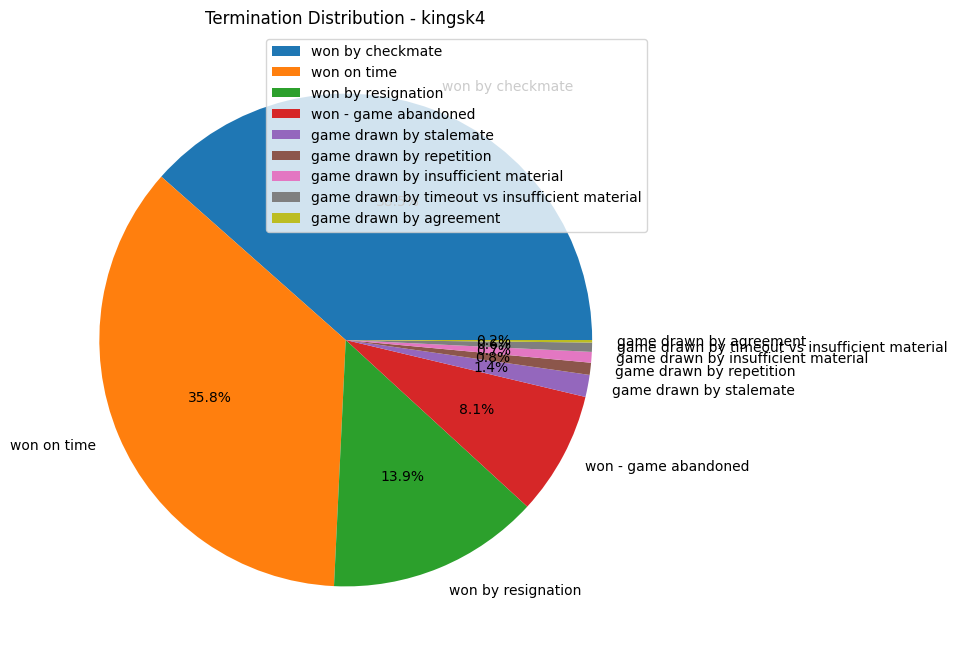

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
termination.plot.pie(autopct='%1.1f%%', legend=True, title = 'Termination Distribution - kingsk4')
plt.ylabel('')
plt.show()